In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def simulate_points(a, b, max_noise):
    x = np.linspace(-3, 3, 20)
    y = a * x + b
    y_noise = np.random.uniform(-max_noise, max_noise, 20)
    y += y_noise
    return (x, y)

In [3]:
(x, y) = simulate_points(3, 5, 4)

In [4]:
x_placeholder = tf.placeholder(tf.float32, [None], name="x")
y_placeholder = tf.placeholder(tf.float32, [None], name="y")

In [5]:
a = tf.Variable(tf.truncated_normal([]), name="a")
b = tf.Variable(tf.constant(0, dtype=tf.float32), name="b")

In [6]:
y_hat = tf.multiply(a, x_placeholder) + b # y = a * x + b
error = tf.reduce_mean(tf.square(y_hat - y_placeholder), name = "MSE")

In [7]:
train = tf.train.GradientDescentOptimizer(0.05).minimize(error)
init = tf.global_variables_initializer()

In [16]:
sess = tf.Session()
sess.run(init)
x_test = np.array([-0.5, 0.0, 5.0])
test_dict = { x_placeholder: x_test }
snapshots = []

for i in range(50):
    feed_dict = {
        x_placeholder: x, # from our sample generating function
        y_placeholder: y # from our sample generating function
    }
    err, _ = sess.run([error, train], feed_dict = feed_dict)
    if i in [0, 1, 4, 10, 49,99]: #Steps we're interested in
        y_test = sess.run(y_hat, feed_dict = test_dict)
        snapshots.append((i, y_test))
    print(str(i) + ":\tMSE: %.3f" % err)

0:	MSE: 58.667
1:	MSE: 37.091
2:	MSE: 25.877
3:	MSE: 19.593
4:	MSE: 15.753
5:	MSE: 13.201
6:	MSE: 11.384
7:	MSE: 10.024
8:	MSE: 8.971
9:	MSE: 8.141
10:	MSE: 7.479
11:	MSE: 6.947
12:	MSE: 6.518
13:	MSE: 6.171
14:	MSE: 5.891
15:	MSE: 5.664
16:	MSE: 5.480
17:	MSE: 5.332
18:	MSE: 5.211
19:	MSE: 5.113
20:	MSE: 5.034
21:	MSE: 4.970
22:	MSE: 4.919
23:	MSE: 4.877
24:	MSE: 4.843
25:	MSE: 4.815
26:	MSE: 4.793
27:	MSE: 4.775
28:	MSE: 4.760
29:	MSE: 4.748
30:	MSE: 4.738
31:	MSE: 4.731
32:	MSE: 4.724
33:	MSE: 4.719
34:	MSE: 4.715
35:	MSE: 4.712
36:	MSE: 4.709
37:	MSE: 4.707
38:	MSE: 4.705
39:	MSE: 4.704
40:	MSE: 4.702
41:	MSE: 4.702
42:	MSE: 4.701
43:	MSE: 4.700
44:	MSE: 4.700
45:	MSE: 4.699
46:	MSE: 4.699
47:	MSE: 4.699
48:	MSE: 4.698
49:	MSE: 4.698


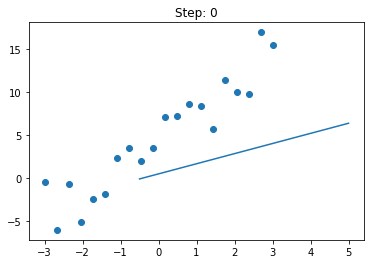

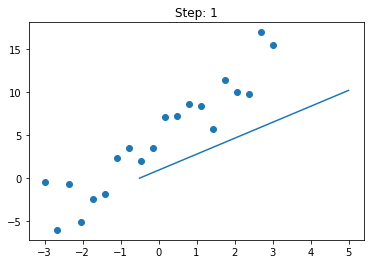

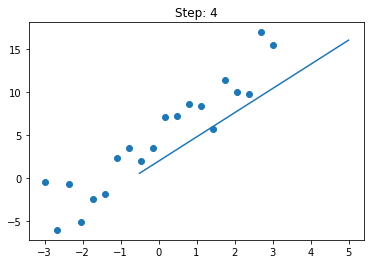

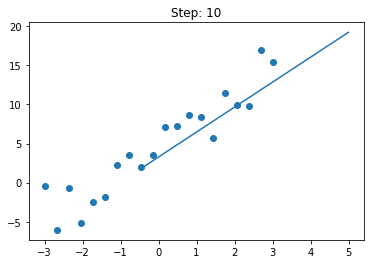

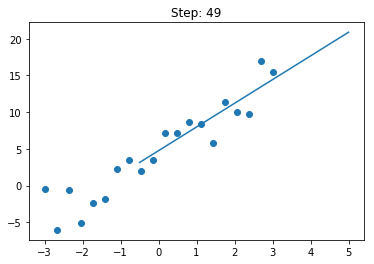

In [17]:
for i, pair in enumerate(snapshots):
    step, y_test = pair
    plt.figure(i)
    plt.title("Step: " + str(step))
    plt.scatter(x, y)
    plt.plot(x_test, y_test)
    plt.show()

In [18]:
### new filed

In [22]:
adult_income = (pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header= None, sep=", "))

/home/dimitar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [24]:
adult_income.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

In [25]:
adult_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


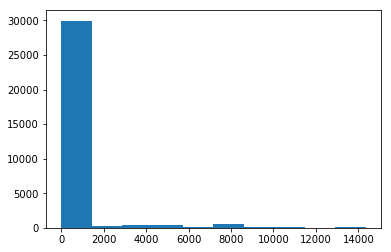

In [28]:
plt.hist(adult_income["capital-gain"][adult_income["capital-gain"] < 15000])
plt.show()

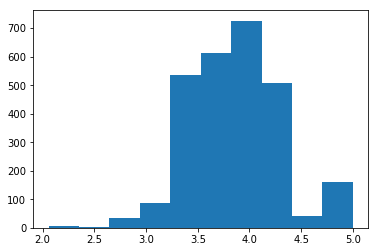

In [29]:
income = adult_income["capital-gain"][adult_income["capital-gain"] > 0]
plt.hist(np.log10(income))
plt.show()

In [36]:
print(len(adult_income["income"]))
print(len(adult_income[adult_income["income"] == "<=50K"]))

32561
24720


In [37]:
adult_income_dummies = pd.get_dummies(adult_income)

In [38]:
adult_income_dummies.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
### MINST

In [40]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [41]:
X = tf.placeholder(tf.float32, [None, 784]) # (28 * 28)-pixel images
Y = tf.placeholder(tf.float32, [None, 10]) # 10 classes

In [42]:
a = tf.Variable(tf.zeros([784, 10]) , name = "weight") # matrix
b = tf.Variable(tf.zeros([10]) , name = "bias") #vector

In [50]:
pred = tf.nn.softmax(tf.matmul(X, a) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred) , axis=1))
correct_prediction = tf.equal(tf.argmax(pred, axis=1), tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [51]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)
init = tf.global_variables_initializer()

In [52]:
batch_size = 128
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(50):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for batch in range(total_batch):
            train_x, train_y = mnist.train.next_batch(batch_size = batch_size)
            o, c = sess.run([optimizer, cost], feed_dict = {X: train_x, Y: train_y})
            avg_cost += c/ total_batch
        print ("Epoch = ", epoch, " Cost = ", c)
        print ("Accuracy:", accuracy.eval(feed_dict = { X: mnist.test.images, Y: mnist.test.labels }))
print ("Optimization Finished")

Epoch =  0  Cost =  0.831403
Accuracy: 0.8444
Epoch =  1  Cost =  0.705632
Accuracy: 0.8676
Epoch =  2  Cost =  0.524704
Accuracy: 0.8769
Epoch =  3  Cost =  0.457803
Accuracy: 0.8825
Epoch =  4  Cost =  0.434139
Accuracy: 0.8868
Epoch =  5  Cost =  0.453901
Accuracy: 0.8906
Epoch =  6  Cost =  0.480056
Accuracy: 0.8926
Epoch =  7  Cost =  0.300369
Accuracy: 0.8964
Epoch =  8  Cost =  0.439031
Accuracy: 0.8978
Epoch =  9  Cost =  0.48996
Accuracy: 0.8993
Epoch =  10  Cost =  0.293558
Accuracy: 0.901
Epoch =  11  Cost =  0.307404
Accuracy: 0.9018
Epoch =  12  Cost =  0.569749
Accuracy: 0.9027
Epoch =  13  Cost =  0.359434
Accuracy: 0.9051
Epoch =  14  Cost =  0.390629
Accuracy: 0.9051
Epoch =  15  Cost =  0.367115
Accuracy: 0.906
Epoch =  16  Cost =  0.34339
Accuracy: 0.9071
Epoch =  17  Cost =  0.301629
Accuracy: 0.9072
Epoch =  18  Cost =  0.429102
Accuracy: 0.9081
Epoch =  19  Cost =  0.467576
Accuracy: 0.9089
Epoch =  20  Cost =  0.22598
Accuracy: 0.9091
Epoch =  21  Cost =  0.37853